In [1]:
import numpy as np
from tifffile import imread, imsave
from glob import glob
import random
import tqdm
from matplotlib import pyplot as plt
from sklearn.feature_extraction import image

In [2]:
X = sorted(glob("/Users/prakash/Desktop/liver/images/*.tif"))

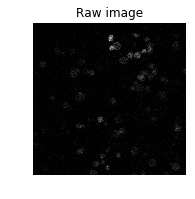

In [3]:
X = list(map(imread,X))
plt.subplot(121); plt.imshow(X[9],cmap='gray');   plt.axis('off'); plt.title('Raw image'); plt.show()

In [4]:
rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
X = [X[i] for i in ind]

print('number of images: %3d' % len(X))


number of images: 300


In [5]:
for i in range(len(X)):
    imsave('/Users/prakash/Desktop/liver/shuffled_images/'+str(i)+'.tif', X[i])

In [6]:
count =0
for i in range (len(X)):
    patchesimages = image.extract_patches_2d(X[i], patch_size=(128,128), max_patches=6, random_state=0)
    for j in range(0, np.shape(patchesimages)[0]):
        imsave('/Users/prakash/Desktop/liver/patches/raw/'+str(count).zfill(4)+'.tif', patchesimages[j])
        count+=1

### Manual annotations of 14 patches was performed at this step. The images chosen for manual annotation were chosen at random depending on the convenience of annotation and also to ensure some diversity. Some were then randomly chosen as validation and rest as train

###### Next the images and their annotations (thos ewhich were not annotated are assigned with zero masks) were then read in next cell.

In [53]:
X_train = sorted(glob("/Users/prakash/Desktop/liver/patches/imageswithgt/raw/*.tif"))
Y_train = sorted(glob("/Users/prakash/Desktop/liver/patches/imageswithgt/labels/*.tif"))

In [56]:
X_val = sorted(glob("/Users/prakash/Desktop/liver/val/raw/*.tif"))
Y_val = sorted(glob("/Users/prakash/Desktop/liver/val/gt/*.tif"))

In [57]:
X_test = sorted(glob("/Users/prakash/Desktop/liver/test/images/*.tif"))
Y_test = sorted(glob("/Users/prakash/Desktop/liver/test/labels/*.tif"))

In [58]:
X_train = list(map(imread,X_train))
Y_train = list(map(imread,Y_train))

X_val = list(map(imread,X_val))
Y_val = list(map(imread,Y_val))

X_test = list(map(imread,X_test))
Y_test = list(map(imread,Y_test))

In [66]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [67]:
np.savez_compressed('/Users/prakash/Desktop/liver/train/train_data.npz', X_train=X_train, Y_train=Y_train, X_val=X_val, Y_val=Y_val)
np.savez_compressed('/Users/prakash/Desktop/liver/test/test_data.npz', X_test=X_test, Y_test=Y_test)